In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.neighbors import KNeighborsClassifier

In [5]:
iris_db = pd.read_csv("Iris.csv")
iris_db.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa


In [8]:
print(iris_db.Species.unique(), iris_db.Species.value_counts(), sep = '\n\n')

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [10]:
label_encoder = LabelEncoder()

iris_db['target'] = label_encoder.fit_transform(iris_db.Species)
iris_db.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
102,103,7.1,3.0,5.9,2.1,Iris-virginica,2
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
36,37,5.5,3.5,1.3,0.2,Iris-setosa,0
139,140,6.9,3.1,5.4,2.1,Iris-virginica,2
87,88,6.3,2.3,4.4,1.3,Iris-versicolor,1


In [40]:
X = iris_db[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_db['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [62]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0,
       0])

Accuracy score : 0.9777777777777777
Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



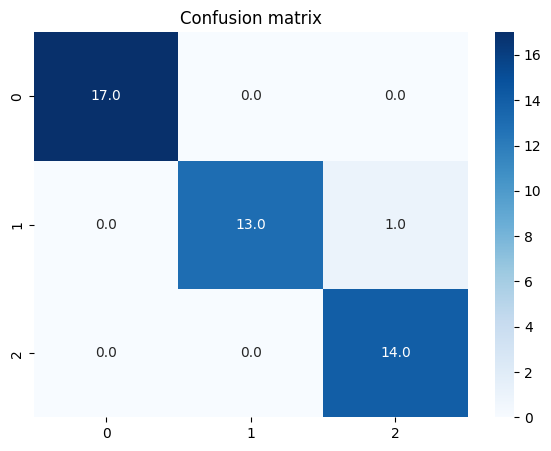

In [64]:
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}', end='\n')
print(f'Classification report : {classification_report(y_test, y_pred)}', end='\n')

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='.1f', cmap='Blues')
plt.title("Confusion matrix")
plt.show()

In [44]:
import joblib

joblib.dump(model, 'KNN_model.pkl')
loaded_model = joblib.load('KNN_model.pkl')

y_pred = loaded_model.predict(X_test)
y_pred

array([0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       0])